#  BY - Gaurav Negi

GRIP- The Sparks Foundation - Data Science and Business Analytics Internship

# Task 2 Prediction using Unsupervised ML

Predicting the optimum number of clusters and representing it visually

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [2]:
#load the iris dataset
df = pd.read_csv('F:/upworker/iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#drop id column as it is not required
df.drop('Id', inplace= True, axis=1)

In [4]:
#Dimension of dataset
df.shape

(150, 5)

In [5]:
#Check if dataset has null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
#Check for duplicate values
df.duplicated().sum()

3

In [7]:
#Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#Descriptiion of the dataset
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#Counting unique species in the dataset
df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
#correlation matrix 
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


C:\Users\GAURAV NEGI\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


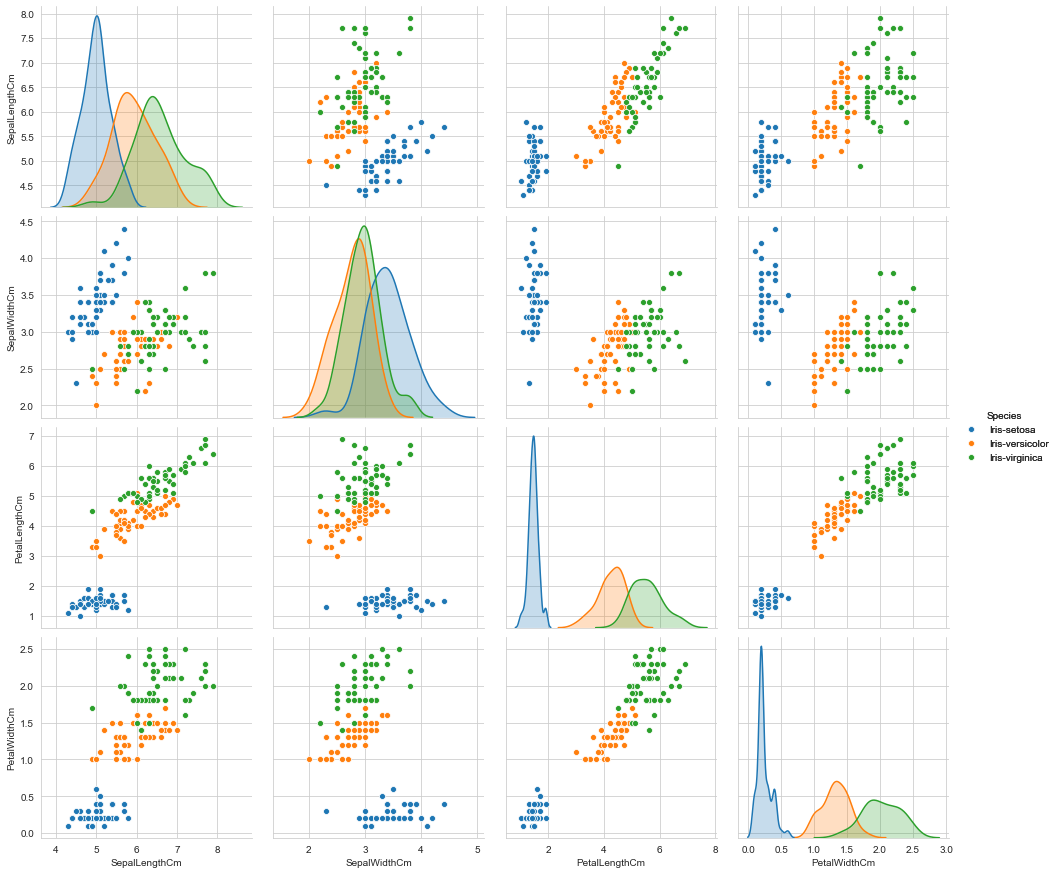

In [11]:
#Visulising data

sns.set_style("whitegrid")
sns.pairplot(data =  df , hue = "Species", size = 3).add_legend()

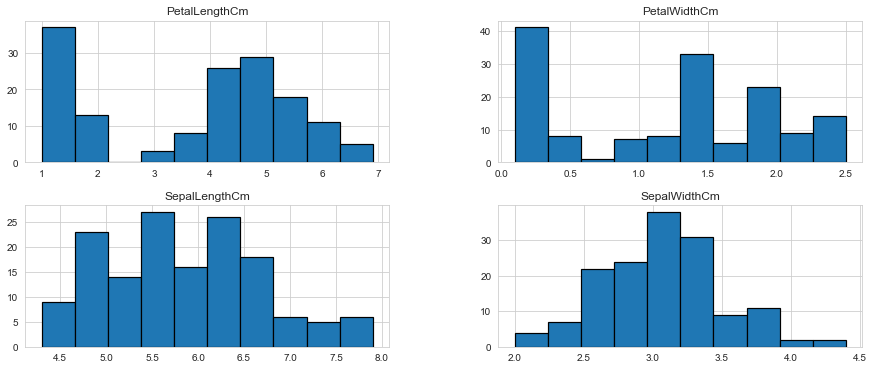

In [12]:
#histograms
df.hist(edgecolor = 'black', linewidth = 1.2)
fig = plt.gcf()
fig.set_size_inches(15,6)

C:\Users\GAURAV NEGI\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


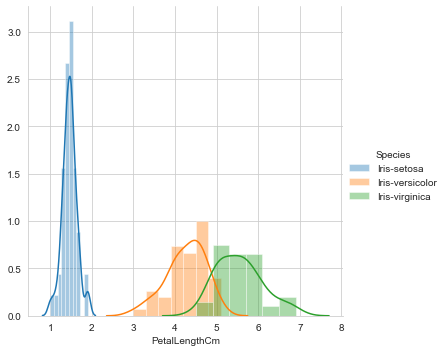

In [13]:
#distplot

sns.FacetGrid(data = df, hue = 'Species', size = 5).map(sns.distplot, "PetalLengthCm").add_legend()

C:\Users\GAURAV NEGI\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


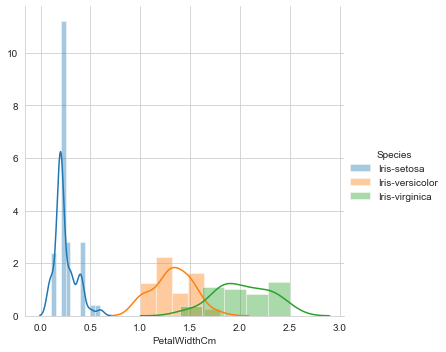

In [14]:
sns.FacetGrid(data=df, hue="Species", size=5) \
   .map(sns.distplot, "PetalWidthCm") \
   .add_legend()

C:\Users\GAURAV NEGI\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


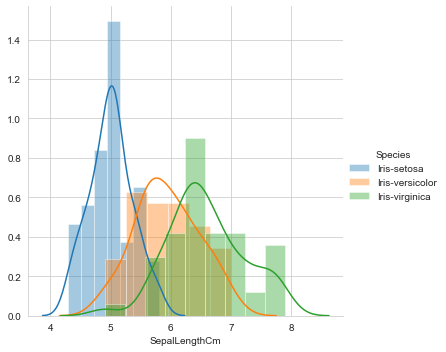

In [15]:
sns.FacetGrid(data=df, hue="Species", size=5) \
   .map(sns.distplot, "SepalLengthCm") \
   .add_legend()

C:\Users\GAURAV NEGI\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


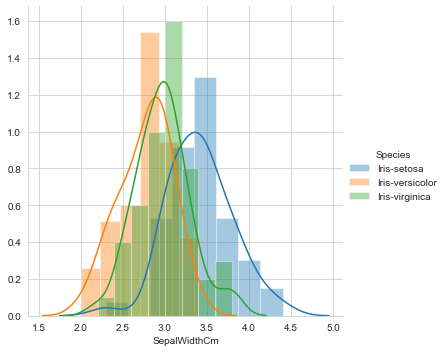

In [16]:
sns.FacetGrid(data=df, hue="Species", size=5) \
   .map(sns.distplot, "SepalWidthCm") \
   .add_legend()

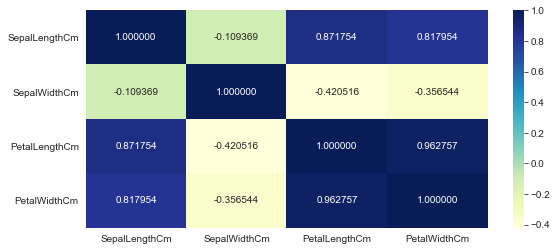

In [17]:
#Lets plot correlation heatmap
plt.figure(figsize=(9,4)) 
sns.heatmap(df.corr(),annot=True,fmt="f",cmap="YlGnBu")

In [18]:
#Applying elbow method to find the optimal no of clusters

x = df.iloc[:, [0,1,2,3]].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Text(0, 0.5, 'wcss')

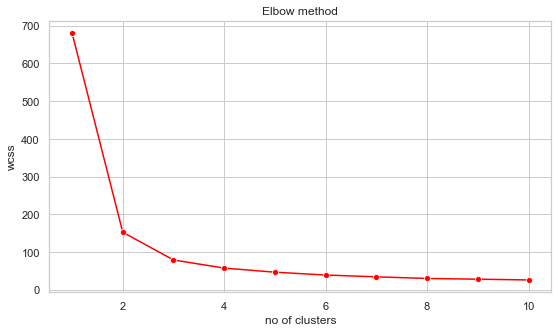

In [19]:
w = []
for i in range(1,11):
    km = KMeans(n_clusters = i, max_iter = 300, init = "k-means++", random_state=0)
    km.fit(x)
    w.append(km.inertia_)


#plot the graph of wcss
plt.figure(figsize = (9,5))
sns.set(style = 'whitegrid')
sns.lineplot(range(1,11), w, marker = 'o', color = 'red')
plt.title('Elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')

at k = 3 inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clustrer is 3. 

In [20]:
#Implementing KMeans using K = 3

kmeans = KMeans(n_clusters=3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
kmeans_y = kmeans.fit_predict(x)

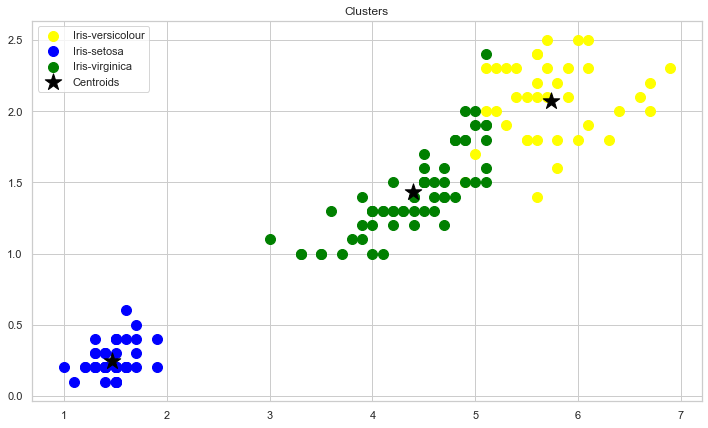

In [21]:
#visualising the clusters
fig = plt.figure(figsize = (12,7))
plt.scatter(x[kmeans_y == 0, 2], x[kmeans_y == 0, 3], s = 100, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[kmeans_y == 1, 2], x[kmeans_y == 1, 3], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[kmeans_y == 2, 2], x[kmeans_y == 2, 3],s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 300, c = 'black',
            marker='*', label = 'Centroids')

plt.title("Clusters")
plt.legend()

Thank you!